In [12]:
#!/usr/bin/env python
# coding: utf-8

# In[29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#苏州街租金单价
suzhoujie_rental=pd.read_csv("/Users/18910/Desktop/苏州街租金信息.csv")
suzhoujie_rental["单价"]=round(suzhoujie_rental["价格"]/suzhoujie_rental["面积(㎡)"],2)
suzhoujie_rental_median=suzhoujie_rental["单价"].median()

df1=pd.DataFrame({"单位租金":suzhoujie_rental["单价"],"location":["苏州街"]*suzhoujie_rental["单价"].shape[0],"面积":suzhoujie_rental["面积(㎡)"]})

#苏州街房价
suzhoujie_price=pd.read_csv("/Users/18910/Desktop/苏州街房子信息.csv")
suzhoujie_price_median=suzhoujie_price["单价(元/㎡)"].median()
suzhoujie_price_df=pd.DataFrame({"单价":suzhoujie_price["单价(元/㎡)"],"location":["苏州街"]*suzhoujie_price["单价(元/㎡)"].shape[0],
                                "面积":suzhoujie_price["面积(㎡)"]})

suzhoujie_price_median

85532.0

In [13]:
#万柳租金单价
rental3=pd.read_csv("/Users/18910/Desktop/万柳租金.csv")
rental3["单价"]=rental3["价格(元/月)"]/rental3["面积（㎡）"]
rental3_median=rental3["单价"].median()
area3=rental3["面积（㎡）"]
df2=pd.DataFrame({"单位租金":rental3["单价"],"location":["万柳"]*rental3["单价"].shape[0],"面积":area3})

#万柳房价
price3=pd.read_csv("/Users/18910/Desktop/万柳房价.csv")
price3_median=price3["单价（元/㎡）"].median()
price3_df=pd.DataFrame({"单价":price3["单价（元/㎡）"],"location":["万柳"]*price3["单价（元/㎡）"].shape[0],
                       "面积":price3["面积（㎡）"]})
price3_median

145637.0

In [14]:
#北太平庄租金单价
rental2=pd.read_csv("/Users/18910/Desktop/北太平庄房租.csv")
rental2["单价"]=rental2["价格"]/rental2["面积（㎡）"]
rental2_median=rental2["单价"].median()
area2=rental2["面积（㎡）"]
df3=pd.DataFrame({"单位租金":rental2["单价"],"location":["北太平庄"]*rental2["单价"].shape[0],"面积":area2})
rental2_median

#北太平庄房价
price2=pd.read_csv("/Users/18910/Desktop/北太平庄房价.csv")
price2_median=price2["单价(元/㎡)"].median()
price2_df=pd.DataFrame({"单价":price2["单价(元/㎡)"],"location":["北太平庄"]*price2["单价(元/㎡)"].shape[0],
                       "面积":price2["面积（㎡）"]})
price2_median


90898.0

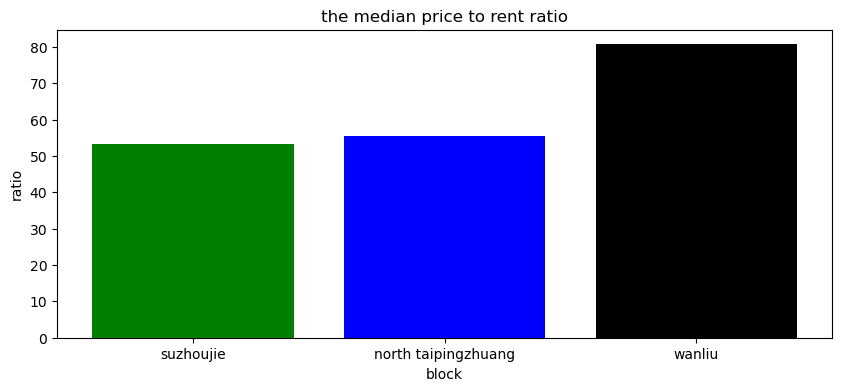

In [15]:
#单价的条形图
plt.figure(figsize=(10, 4))
locations = ["suzhoujie", "north taipingzhuang","wanliu"]
median_rent=[suzhoujie_price_median/(suzhoujie_rental_median*12),price2_median/(rental2_median*12),price3_median/(rental3_median*12)]
plt.bar(locations,median_rent, color=["green","blue","black"])
plt.xlabel("block")
plt.ylabel("ratio")
plt.title("the median price to rent ratio")
plt.show()

df_combined = pd.concat([df1, df2, df3], ignore_index=True)

In [16]:
df = pd.get_dummies(df_combined, columns=['location'])
df['m2_苏州街_interaction'] = df['面积'] * df['location_苏州街']
df['m2_万柳_interaction'] = df['面积'] * df['location_万柳']
df['m2_北太平庄_interaction'] = df['面积'] * df['location_北太平庄']
X = df[['面积', 'location_苏州街', 'location_北太平庄',"location_万柳",'m2_苏州街_interaction', 'm2_北太平庄_interaction',"m2_万柳_interaction"]]
y = df['单位租金']

model = LinearRegression()
model.fit(X, y)
print(f"回归系数: {model.coef_}")
print(f"截距: {model.intercept_}")
print(f"R² 分数: {model.score(X, y)}")

回归系数: [-4.37306211e-01  7.68152606e+01 -1.52200027e+01 -6.15952580e+01
 -1.18961886e+00  5.75409232e-03  7.46558556e-01]
截距: 182.4827384297336
R² 分数: 0.2260245464061389


In [17]:
new_data = pd.DataFrame({
    '面积': [50, 50, 50],  # 新的面积数据
    'location_苏州街': [1, 0, 0],  # 新的苏州街位置数据
    'location_北太平庄': [0, 1, 0],  # 新的北太平庄位置数据
    'location_万柳': [0, 0, 1],  # 新的万柳位置数据
    'm2_苏州街_interaction': [100 * 1, 150 * 0, 200 * 0],  # 面积与苏州街的交互项
      # 面积与万柳的交互项
    'm2_北太平庄_interaction': [100 * 0, 150 * 1, 200 * 0],'m2_万柳_interaction': [100 * 0, 150 * 0, 200 * 1]  # 面积与北太平庄的交互项
})
predictions = model.predict(new_data)
print("预测的单位租金:", predictions)

df_combined2 = pd.concat([suzhoujie_price_df,price2_df,price3_df], ignore_index=True)

预测的单位租金: [118.47080256 146.26053906 248.333881  ]


In [18]:
#房价的多元回归
df2 = pd.get_dummies(df_combined2, columns=['location'])
df2['m2_苏州街_interaction'] = df['面积'] * df['location_苏州街']
df2['m2_万柳_interaction'] = df['面积'] * df['location_万柳']
df2['m2_北太平庄_interaction'] = df['面积'] * df['location_北太平庄']
X = df2[['面积', 'location_苏州街', 'location_北太平庄',"location_万柳",'m2_苏州街_interaction', 'm2_北太平庄_interaction',"m2_万柳_interaction"]]
y=df2["单价"]
model = LinearRegression()
model.fit(X, y)
print(f"回归系数: {model.coef_}")
print(f"截距: {model.intercept_}")
print(f"R² 分数: {model.score(X, y)}")

回归系数: [ 2.33805351e+02 -2.04243604e+04 -9.14477675e+03  2.95691372e+04
  7.32017423e+01  0.00000000e+00  2.33953023e+01]
截距: 81502.2696542804
R² 分数: 0.5601109978241835


In [19]:
#房价预测
new_data = pd.DataFrame({
    '面积': [50, 50, 50],  
    'location_苏州街': [1, 0, 0],  
    'location_北太平庄': [0, 1, 0],  
    'location_万柳': [0, 0, 1],  
    'm2_苏州街_interaction': [100 * 1, 150 * 0, 200 * 0],  

    'm2_北太平庄_interaction': [100 * 0, 150 * 1, 200 * 0],'m2_万柳_interaction': [100 * 0, 150 * 0, 200 * 1]  # 面积与北太平庄的交互项
})
predictions = model.predict(new_data)
print("预测的单位价格:", predictions)

预测的单位价格: [ 80088.35100346  84047.76042608 127440.73479323]


In [ ]:
new_data = pd.DataFrame({
    '面积': [100, 100, 100],  
    'location_苏州街': [1, 0, 0],  
    'location_北太平庄': [0, 1, 0],  
    'location_万柳': [0, 0, 1],  
    'm2_苏州街_interaction': [100 * 1, 150 * 0, 200 * 0],  
      
    'm2_北太平庄_interaction': [100 * 0, 150 * 1, 200 * 0],'m2_万柳_interaction': [100 * 0, 150 * 0, 200 * 1]  # 面积与北太平庄的交互项
})
predictions = model.predict(new_data)
print("预测的单位价格:", predictions)